In [2]:
# Importing Pandas for Dataframe Manipulation as well as Matplotlib and Seaborn for visualization purposes.
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Reading in our Iris Data and printing the first five rows out to the console.
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Dropping the 'Id' column from our dataframe (since we don't need an additional index).
df.drop("Id", axis=1, inplace=True)

# Viewing our modified dataframe.
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Importing the Label Encoder Class.
from sklearn.preprocessing import LabelEncoder

# Creating a new Label Encoder object.
encoder = LabelEncoder()

# Using the "fit_transform" method to label encode the species column (0: Setosa, 1: Versicolor, and 2: Virginica).
df["Species"] = encoder.fit_transform(df["Species"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Importing the 'Train_Test_Split' function fron Scikit-Learn's 'model_selection' package.
from sklearn.model_selection import train_test_split

# Splitting up our dataframe into x and y subsets (x are the independent variables and y is the dependent variable species).
x_data = df.drop("Species", axis=1)
y_data = df["Species"]

# Retrieving X and Y train-test sets by calling the 'train_test_split' function. (80-20 Split)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [6]:
# Importing the RandomForestClassifier Class from Scikit-Learn's 'ensemble' package.
from sklearn.ensemble import RandomForestClassifier

# Creating a new classifier with twenty individual decision trees used to build the random forest.
model = RandomForestClassifier(n_estimators=20)

# Training our model on the X and Y train sets.
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
# Printing out the accuracy measure for our model.
print("Model Accuracy: " + str(model.score(x_test, y_test)))

Model Accuracy: 0.8666666666666667


In [8]:
# Printing out the importance for each independent variable (feature) with the "feature_importances_" field.
feature_imp = pd.Series(model.feature_importances_, index=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]).sort_values(ascending=False)
feature_imp

Petal Width     0.556327
Petal Length    0.369421
Sepal Length    0.057320
Sepal Width     0.016932
dtype: float64

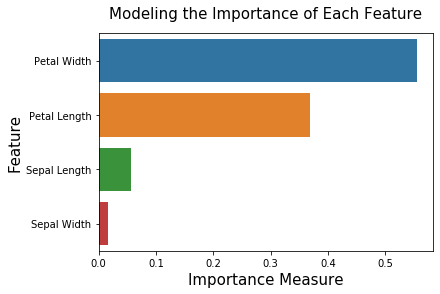

In [9]:
# Creating a barplot of the feature importance.
sns.barplot(x=feature_imp, y=feature_imp.index)

# Adding extra metadata (axis labels, title) to our bar plot for increased readability.
plt.title("Modeling the Importance of Each Feature", pad=15, fontsize=15)
plt.xlabel("Importance Measure", fontsize=15)
plt.ylabel("Feature", fontsize=15)

# Visualizing our barplot!
plt.show()

In [10]:
# Refining our X Data by dropping all non-predictive independent variables (Sepal Length, Sepal Width).
x_data = df.drop(["SepalLengthCm", "SepalWidthCm", "Species"], axis=1)

# Setting our Y Data to our dependent variable 'species'.
y_data = df["Species"]

# Visualizing our X Data.
x_data.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [11]:
# Performing our train-test split again on the new x and y datasets.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

# Fitting a Random Forest model to our new training data.
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train, y_train)

# Printing out the accuracy measure of our model.
print("Model Accuracy: " + str(model.score(x_test, y_test)))

Model Accuracy: 1.0


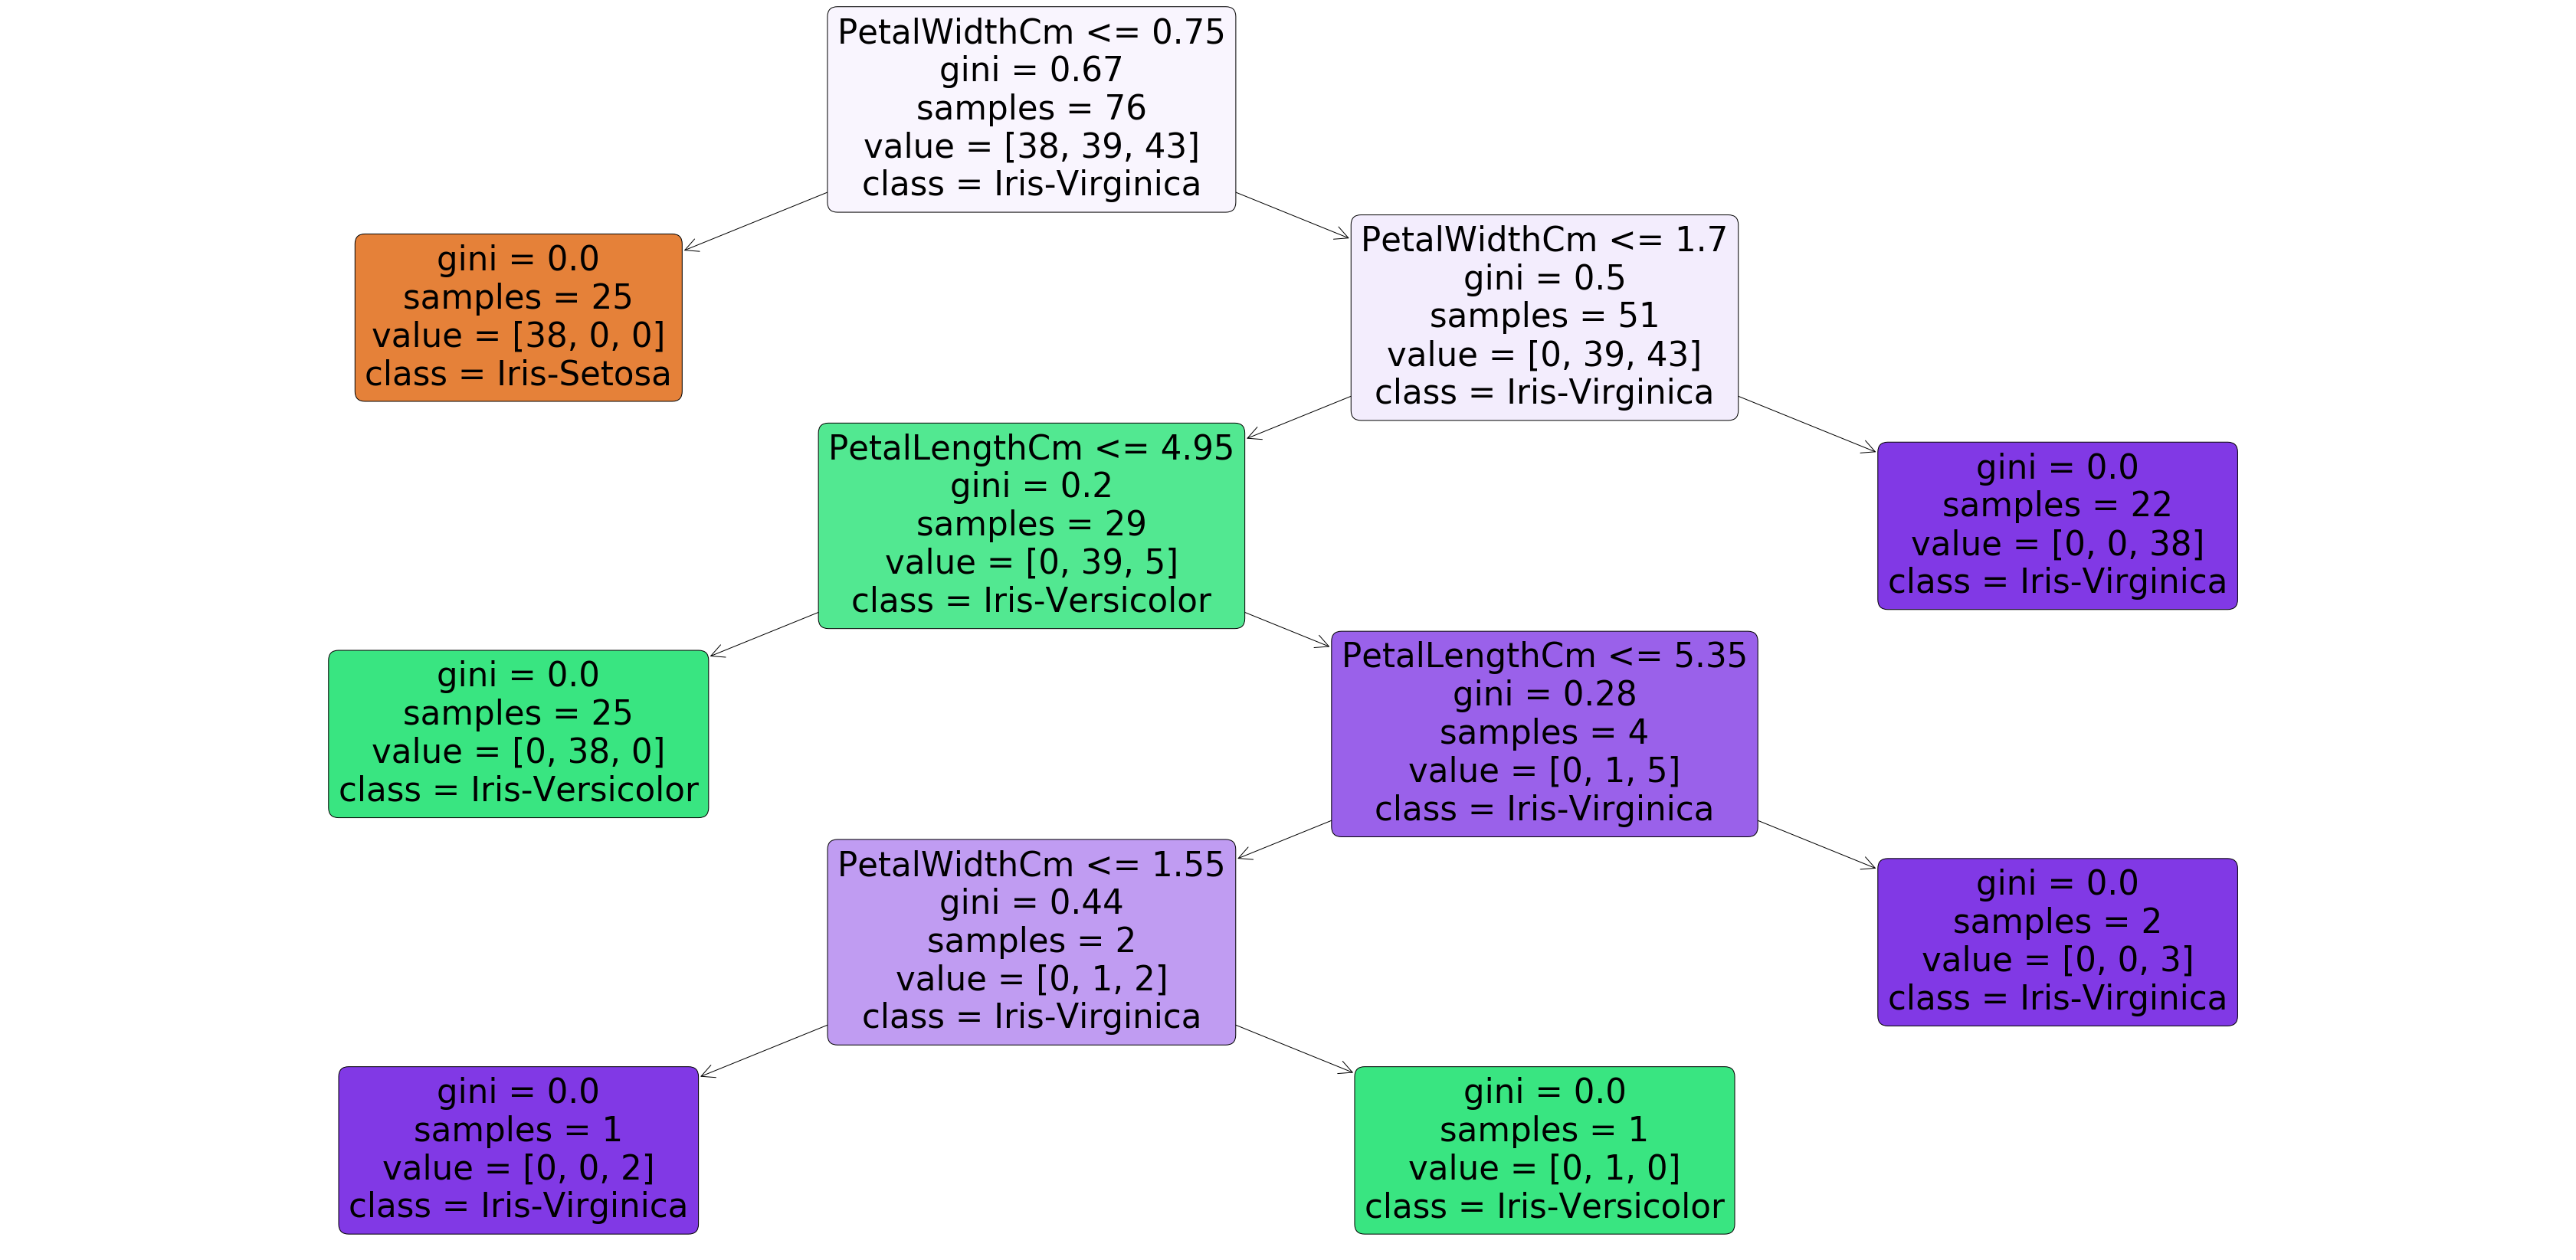

In [19]:
# Importing the 'plot_tree' function (to be used for visualization purposes).
from sklearn.tree import plot_tree

# Setting the size of our figure to 60 by 30.
plt.figure(figsize=(60,30))

# Visualizing one of the decision trees from our Random Forest model.
plot_tree(model.estimators_[5], 
          filled=True, # specifies whether or not the decision nodes should be filled appropriately or not.
          feature_names = ["PetalLengthCm", "PetalWidthCm"], # names of our independent variables.
          class_names = ["Iris-Setosa", "Iris-Versicolor", "Iris-Virginica"], # values of our dependent variable.
          rounded = True, # rounding probablities.
          proportion = False, # removing percentages.
          precision = 2); # setting number of significant figures to two.